# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data/human_body_temperature.csv')

In [9]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [10]:
temp = df['temperature']

1. Is the distribution of body temperatures normal?

Yes, ecdf and theoritical cdf are close to Normal Distribution, hence we can consider the distribution as normal. 

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

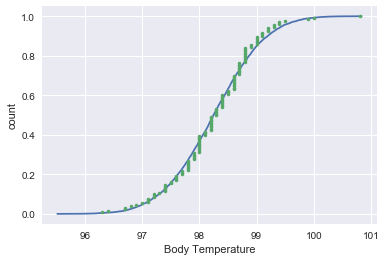

In [18]:
mean = np.mean(temp)
std = np.std (temp)


samples = np.random.normal(mean , std, size = 10000)
x_vers , y_vers = ecdf(temp)
x_theor , y_theor = ecdf (samples)


sns.set()

_ = plt.plot (x_theor , y_theor)
_ = plt.plot(x_vers , y_vers , marker = '.' , linestyle = 'none')

_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('count')

plt.show()

2. Is the sample size large? 

Yes, 130 can be coonsidered a large enough sample size for Central Limit Theorem 

Are the observations independent?

Yes, body temprature of each person is independant froom the body tempreture of others. 

In [20]:
len(temp)

130

3. True population mean

Is the true population mean really 98.6 degrees F? 
H0: mu = 98.6
Ha : mu <= 98.6
P-Value is 0, that means data is statistically significant and the difference between sample mean and theoretical mean is not due to chance and the average human body temprature is closer to 98.2. We can reject Null hypothesis. 

Would you use a one-sample or two-sample test? Why? One-Sample test. Beacuse we are comparing one set of data to a single number. 

In this situation, is it appropriate to use the $t$ or $z$ statistic? T-Test, since the std of the population is unknown. 
Now try using the other test. How is the result be different? Why?

In [22]:
# Bootstrap replicate function

def bootstrap_replicate_1d(data ,  func) : 
    return func(np.random.choice(data , len(data)))

In [23]:
## Many Bootstrap replicates

def draw_bs_reps(data , func , size):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size): 
        bs_replicates[i] = bootstrap_replicate_1d(data , func)
    return bs_replicates

In [34]:
def diff_from_reality(temp , pop_temp = 98.6):
    return np.mean(temp) - pop_temp

diff_obs = diff_from_reality(temp)

diff_obs

-0.35076923076921673

In [28]:
temp_shifted = temp - mean + 98.6

# Take 10,000 bootstrap replicates of the mean: bs_replicates

bs_replicates = draw_bs_reps(temp_shifted , diff_from_reality , 10000)


actual_mean = 98.6 
p_value = np.sum(bs_replicates <= diff_obs) / len(bs_replicates)

print ('p_value is : ', p_value)

p_value is :  0.0


In [32]:
from statsmodels.stats.weightstats import ztest

z = ztest(temp , value = 98.6)

print("Z-score is equal to : %6.3F  p-value equal to: %6.9F" % (abs(z[0]),z[1]))

Z-score is equal to :  5.455  p-value equal to: 0.000000049


4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use? T- test, sample size is less than 30.

What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic? With smaller sample P-Value increases. 

In [80]:
import scipy

In [81]:
sample = np.random.choice(temp , size = 10)

scipy.stats.ttest_ind(temp , sample)

Ttest_indResult(statistic=-1.8744119321693316, pvalue=0.06298759112811332)

In [41]:
diff_obs = diff_from_reality(temp)

temp_shifted = temp - mean + 98.6


for i in range (10000):
    bs_samples = np.random.choice (temp_shifted , 10)
    bs_replicates [i] = np.mean(bs_samples) - 98.6

p_value = np.sum(bs_replicates <= diff_obs)/len(bs_replicates)
    
print ('p_value is : ', p_value)

p_value is :  0.0645


5. At what temperature should we consider someone's temperature to be "abnormal"?

Normal human body is between 98.1223 and 98.3753. We should consider tempreture ooutside this range as abnormal.  

In [82]:
bs_replicate = np.empty(100000)

for i in range (100000):
    bs_samples = np.random.choice(temp, len(temp))
    bs_replicate[i] = np.mean(bs_samples)

print('95% Confidence Intervals:' , np.percentile(bs_replicate,[2.5,97.5]))

      
# calculate the Margine of error

MOE =  1.96 * np.std(temp) / np.sqrt(len(temp))

print ('Margin of Error:' , MOE)

95% Confidence Intervals: [98.12307692 98.37538462]
Margin of Error: 0.125550964802579


6. Is there a significant difference between males and females in normal temperature?

What test did you use and why? 

permutation replicates

Write a story with your conclusion in the context of the original problem.

H0 = There is a significant difference between males and females. 
P-Value is slightly over 0.01, which means we can't reject the H0 and there is a difference between the Male and Female body temp.

In [48]:
Male = df[df.gender == 'M']['temperature']
Female = df[df.gender == 'F']['temperature']

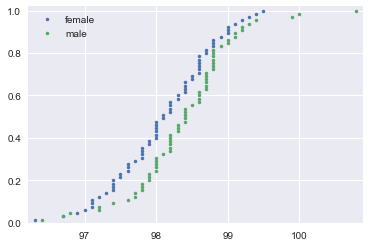

Actual difference in mean: 0.289230769230727 degrees Fahrenheit


In [68]:
f_x , f_y = ecdf(Male)
m_x , m_y = ecdf (Female)

plt.plot(f_x, f_y, marker = '.', linestyle='none')
plt.plot(m_x, m_y, marker = '.', linestyle = 'none')

plt.margins(0.02)
plt.legend(('female','male'))

plt.show()


print('Actual difference in mean:' , observed_statistic , 'degrees Fahrenheit')


In [76]:
def permutation_sample(data1 , data2):
     """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
     data = np.concatenate((data1 , data2))
    # Permute the concatenated array: permuted_data
     permutated_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
     perm_sample_1 = permutated_data[:len(data1)]
     perm_sample_2 = permutated_data[len(data1):]
     
    
    
     return perm_sample_1 , perm_sample_2


In [78]:
def draw_perm_reps(data1 , data2 , func , size):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size) : 
        
        perm_sample_1,  perm_sample_2 = permutation_sample(data1, data2)        
        perm_replicates[i] = func(perm_sample_1) - func(perm_sample_2)
        
    return perm_replicates

In [79]:
observed_statistic = np.mean(Female) - np.mean(Male)

perm_replicates = draw_perm_reps(Female , Male , np.mean , 100000)

p_value = np.sum(perm_replicates >= observed_statistic) / len(perm_replicates)

print ('P-Value : ', p_value)

P-Value :  0.012


In [83]:
male = df[df.gender == 'M']['temperature']
female = df[df.gender == 'F']['temperature']

m_std = np.std(male)
f_std = np.std(female)

SE = np.sqrt((m_std ** 2 / len(male)) + (f_std ** 2 / len(female)))
z = (np.mean(female)- np.mean(male))/ SE

z

2.3032202891940123

In [84]:
p_value = scipy.stats.norm.sf(abs(z))
p_value

0.010633225915064675